In [1]:
class MyLR:
    def __init__(self):
        self.m=None
        self.b=None
    
    def fit(self,X_train,Y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num=num + ((X_train[i]-X_train.mean()) * (Y_train[i]-Y_train.mean()))
            den=den + (X_train[i]-X_train.mean()) * (X_train[i]-X_train.mean())
            self.m=num/den
            self.b=Y_train.mean() - self.m * X_train.mean()
        
    def predict(self,X_test):
        
        return self.m * X_test + self.b

In [3]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [8]:
df=df.drop(columns=['placement_exam_marks'])
df.head()


,cgpa,placed
0,7.19,1
1,7.46,1
2,7.54,1
3,6.42,1
4,7.23,0


In [ ]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values


array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)
X_train

array([7.57, 5.52, 6.75, 7.71, 5.77, 6.9 , 6.97, 6.4 , 7.12, 7.82, 5.74,
       6.55, 7.46, 7.78, 7.29, 7.  , 6.93, 6.98, 7.34, 7.42, 6.51, 6.59,
       6.01, 7.07, 6.1 , 6.74, 7.61, 6.93, 6.96, 6.87, 7.31, 7.49, 7.24,
       7.08, 6.1 , 6.76, 5.97, 7.11, 6.84, 5.92, 7.2 , 6.22, 6.34, 6.64,
       7.06, 7.21, 7.96, 7.03, 7.22, 7.34, 6.87, 7.32, 7.14, 7.8 , 6.67,
       6.49, 6.31, 7.2 , 6.38, 6.87, 6.94, 7.  , 7.95, 7.46, 6.82, 7.73,
       6.85, 7.  , 7.07, 7.31, 7.37, 5.74, 7.47, 7.52, 7.23, 7.56, 8.29,
       7.16, 7.01, 6.95, 7.31, 6.74, 6.51, 7.41, 7.97, 7.  , 6.22, 8.03,
       6.04, 5.68, 6.9 , 6.57, 6.26, 7.18, 7.03, 6.5 , 6.37, 6.18, 7.49,
       6.81, 7.61, 6.67, 7.16, 6.74, 6.77, 6.48, 6.24, 6.52, 7.33, 7.31,
       7.17, 6.63, 8.21, 7.18, 7.9 , 7.54, 7.23, 6.3 , 7.07, 6.58, 7.19,
       7.98, 6.59, 6.17, 5.94, 6.21, 6.86, 7.3 , 6.52, 6.38, 6.9 , 7.2 ,
       6.87, 7.12, 7.17, 6.28, 7.46, 5.91, 6.63, 7.65, 6.73, 7.31, 5.48,
       6.12, 6.24, 8.04, 7.28, 5.83, 6.55, 7.67, 7.

In [12]:
model=MyLR()

In [13]:
model.fit(X_train,Y_train)

In [16]:
model.predict(X_test)
model.predict(5)

np.float64(0.4519658755569409)

In [28]:
import matplotlib.pyplot as plt

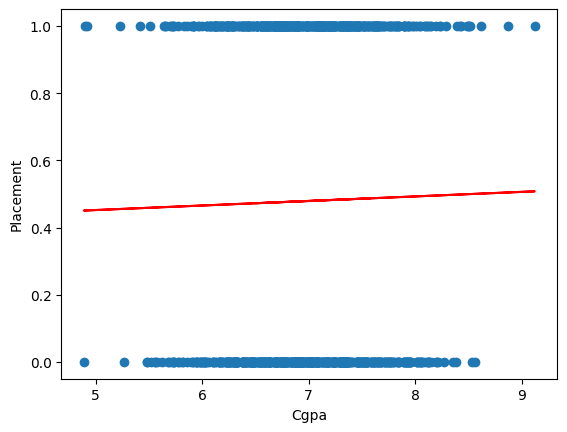

In [29]:
plt.scatter(df['cgpa'],df['placed'])
plt.plot(X_train,model.predict(X_train),color='red')
plt.xlabel('Cgpa')
plt.ylabel('Placement')
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [18]:
Y_pred=model.predict(X_test)

In [19]:
print('MAE',mean_absolute_error(Y_pred,X_test))

MAE 6.413733389343862


In [20]:
print('MSE',mean_squared_error(Y_pred,X_test))

MSE 41.52584450377886


In [21]:
print('RMAE',np.sqrt(mean_absolute_error(Y_pred,X_test)))

RMAE 2.5325349729754696


In [23]:
print('R2_score',r2_score(Y_pred,X_test))

R2_score -565689.284052221
